In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import scipy 
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.graphics.factorplots import interaction_plot
import warnings
warnings.filterwarnings('ignore')


In [2]:
kapil=pd.read_csv("spd.csv")

kapil


,rep,nit,var,value
0,rep1,n0,v1,4430
1,rep1,n0,v2,3944
2,rep1,n0,v3,3464
3,rep1,n0,v4,4126
4,rep2,n0,v1,4478
...,...,...,...,...
67,rep2,n5,v4,1380
68,rep3,n5,v1,8818
69,rep3,n5,v2,6006
70,rep3,n5,v3,5480


In [3]:
results = smf.ols("value~ rep+nit*var+rep:nit",data=kapil).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     15.71
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.85e-13
Time:                        17:27:31   Log-Likelihood:                -536.73
No. Observations:                  72   AIC:                             1145.
Df Residuals:                      36   BIC:                             1227.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4187.8333    418.079     10.017      0.000    3339.930    5035.736
rep[T.rep2]             313.5000    418.079      0.750      0.458    -534.403    1161.403
rep[T.rep3]            -119.0000    418.079     -0.285      0.778    -966.903     728.903
nit[T.n1]              1476.0000    591.253      2.496      0.017     276.884    2675.116
nit[T.n2]              2064.4167    591.253      3.492      0.001     865.301    3263.533
nit[T.n3]              2222.1667    591.253      3.758      0.001    1023.051    3421.283
nit[T.n4]              3430.0000    591.253      5.801      0.000    2230.884    4629.116
nit[T.n5]              4346.5833    591.253      7.351      0.000    3147.467    5545.699
var[T.v2]                53.3333    482.756      0.110      0.913    -925.741    1032.408
var[T.v3]             -1069.3333    482.756     -2.215      0.033   -2048.408     -90.259
var[T.v4]               228.6667    482.756      0.474      0.639    -750.408    1207.741
nit[T.n1]:var[T.v2]     256.6667    682.720      0.376      0.709   -1127.953    1641.287
nit[T.n2]:var[T.v2]    -194.3333    682.720     -0.285      0.778   -1578.953    1190.287
nit[T.n3]:var[T.v2]     109.0000    682.720      0.160      0.874   -1275.620    1493.620
nit[T.n4]:var[T.v2]    -666.0000    682.720     -0.976      0.336   -2050.620     718.620
nit[T.n5]:var[T.v2]   -2213.6667    682.720     -3.242      0.003   -3598.287    -829.047
nit[T.n1]:var[T.v3]     840.0000    682.720      1.230      0.227    -544.620    2224.620
nit[T.n2]:var[T.v3]     663.3333    682.720      0.972      0.338    -721.287    2047.953
nit[T.n3]:var[T.v3]     350.6667    682.720      0.514      0.611   -1033.953    1735.287
nit[T.n4]:var[T.v3]     193.3333    682.720      0.283      0.779   -1191.287    1577.953
nit[T.n5]:var[T.v3]   -1566.0000    682.720     -2.294      0.028   -2950.620    -181.380
nit[T.n1]:var[T.v4]   -1084.6667    682.720     -1.589      0.121   -2469.287     299.953
nit[T.n2]:var[T.v4]   -1816.6667    682.720     -2.661      0.012   -3201.287    -432.047
nit[T.n3]:var[T.v4]   -3145.3333    682.720     -4.607      0.000   -4529.953   -1760.713
nit[T.n4]:var[T.v4]   -5745.3333    682.720     -8.415      0.000   -7129.953   -4360.713
nit[T.n5]:var[T.v4]   -7048.6667    682.720    -10.324      0.000   -8433.287   -5664.047
rep[T.rep2]:nit[T.n1]  -375.5000    591.253     -0.635      0.529   -1574.616     823.616
rep[T.rep3]:nit[T.n1]   205.5000    591.253      0.348      0.730    -993.616    1404.616
rep[T.rep2]:nit[T.n2]   -28.2500    591.253     -0.048      0.962   -1227.366    1170.866
rep[T.rep3]:nit[T.n2]   277.0000    591.253      0.468      0.642    -922.116    1476.116
rep[T.rep2]:nit[T.n3]   383.2500    591.253      0.648      0.521    -815.866    1582.366
rep[T.rep3]:nit[T.n3]  

In [4]:
md = smf.mixedlm("value ~ rep+nit*var", kapil, groups=kapil["rep"])
mdf = md.fit(method=["lbfgs"])
mdf.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
================================================================================
Model:                     MixedLM        Dependent Variable:        value      
No. Observations:          72             Method:                    REML       
No. Groups:                3              Scale:                     304446.7820
Min. group size:           24             Log-Likelihood:            -371.4871  
Max. group size:           24             Converged:                 Yes        
Mean group size:           24.0                                                 
--------------------------------------------------------------------------------
                      Coef.        Std.Err.       z    P>|z|   [0.025    0.975] 
--------------------------------------------------------------------------------
Intercept             4143.472         643.728   6.437 0.000  2881.788  5405.156
rep[T.rep2]            280.458         796.407   0.352 0.725 -1280.471  1841.387
rep[T.rep3]             47.125         796.407   0.059 0.953 -1513.804  1608.054
nit[T.n1]             1419.333         450.516   3.150 0.002   536.339  2302.328
nit[T.n2]             2147.333         450.516   4.766 0.000  1264.339  3030.328
nit[T.n3]             2480.000         450.516   5.505 0.000  1597.005  3362.995
nit[T.n4]             3310.667         450.516   7.349 0.000  2427.672  4193.661
nit[T.n5]             4448.000         450.516   9.873 0.000  3565.005  5330.995
var[T.v2]               53.333         450.516   0.118 0.906  -829.661   936.328
var[T.v3]            -1069.333         450.516  -2.374 0.018 -1952.328  -186.339
var[T.v4]              228.667         450.516   0.508 0.612  -654.328  1111.661
nit[T.n1]:var[T.v2]    256.667         637.126   0.403 0.687  -992.077  1505.410
nit[T.n2]:var[T.v2]   -194.333         637.126  -0.305 0.760 -1443.077  1054.410
nit[T.n3]:var[T.v2]    109.000         637.126   0.171 0.864 -1139.743  1357.743
nit[T.n4]:var[T.v2]   -666.000         637.126  -1.045 0.296 -1914.743   582.743
nit[T.n5]:var[T.v2]  -2213.667         637.126  -3.474 0.001 -3462.410  -964.923
nit[T.n1]:var[T.v3]    840.000         637.126   1.318 0.187  -408.743  2088.743
nit[T.n2]:var[T.v3]    663.333         637.126   1.041 0.298  -585.410  1912.077
nit[T.n3]:var[T.v3]    350.667         637.126   0.550 0.582  -898.077  1599.410
nit[T.n4]:var[T.v3]    193.333         637.126   0.303 0.762 -1055.410  1442.077
nit[T.n5]:var[T.v3]  -1566.000         637.126  -2.458 0.014 -2814.743  -317.257
nit[T.n1]:var[T.v4]  -1084.667         637.126  -1.702 0.089 -2333.410   164.077
nit[T.n2]:var[T.v4]  -1816.667         637.126  -2.851 0.004 -3065.410  -567.923
nit[T.n3]:var[T.v4]  -3145.333         637.126  -4.937 0.000 -4394.077 -1896.590
nit[T.n4]:var[T.v4]  -5745.333         637.126  -9.018 0.000 -6994.077 -4496.590
nit[T.n5]:var[T.v4]  -7048.667         637.126 -11.063 0.000 -8297.410 -5799.923
Group Var           304446.782 13995440145.183                                  
================================================================================

"""

In [5]:
anova = sm.stats.anova_lm(results,test='F')
anova

,df,sum_sq,mean_sq,F,PR(>F)
rep,2.0,1.082577e+06,5.412883e+05,1.548397,2.264146e-01
nit,5.0,3.042920e+07,6.085840e+06,17.409014,9.634328e-09
var,3.0,8.988810e+07,2.996270e+07,85.710615,1.855342e-16
nit:var,15.0,6.934349e+07,4.622899e+06,13.224159,2.104666e-10
rep:nit,10.0,1.419679e+06,1.419679e+05,0.406110,9.348084e-01
Residual,36.0,1.258487e+07,3.495798e+05,NaN,NaN


In [6]:
data =pd.read_csv("spd1.csv")
print(data)

      new   rep nit
0   15964  rep1  n0
1   17218  rep2  n0
2   15488  rep3  n0
3   21880  rep1  n1
4   21632  rep2  n1
5   22226  rep3  n1
6   22874  rep1  n2
7   24015  rep2  n2
8   23506  rep3  n2
9   22167  rep1  n3
10  24954  rep2  n3
11  23252  rep3  n3
12  23466  rep1  n4
13  23064  rep2  n4
14  23214  rep3  n4
15  22522  rep1  n5
16  24721  rep2  n5
17  22318  rep3  n5


In [7]:
results1 = smf.ols("new~ C(rep)+C(nit)",data=data).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    new   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     31.71
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           4.78e-06
Time:                        17:28:44   Log-Likelihood:                -139.50
No. Observations:                  18   AIC:                             295.0
Df Residuals:                      10   BIC:                             302.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.579e+04    502.382     31.423      0.000    1.47e+04    1.69e+04
C(rep)[T.rep2]  1121.8333    435.075      2.578      0.027     152.425    2091.241
C(rep)[T.rep3]   188.5000    435.075      0.433      0.674    -780.908    1157.908
C(nit)[T.n1]    5689.3333    615.289      9.247      0.000    4318.383    7060.283
C(nit)[T.n2]    7241.6667    615.289     11.770      0.000    5870.717    8612.617
C(nit)[T.n3]    7234.3333    615.289     11.758      0.000    5863.383    8605.283
C(nit)[T.n4]    7024.6667    615.289     11.417      0.000    5653.717    8395.617
C(nit)[T.n5]    6963.6667    615.289     11.318      0.000    5592.717    8334.617
==============================================================================
Omnibus:                        1.710   Durbin-Watson:                   3.241
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.050
Skew:                          -0.255   Prob(JB):                        0.592
Kurtosis:                       1.932   Cond. No.                         7.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
anova = sm.stats.anova_lm(results1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(rep),2.0,4.330307e+06,2.165153e+06,3.812752,0.058788
C(nit),5.0,1.217168e+08,2.434336e+07,42.867724,0.000002
Residual,10.0,5.678715e+06,5.678715e+05,NaN,NaN


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
    v1     v2  -398.0556 0.7703 -1539.0672   742.9561  False
    v1     v3  -989.1111 0.1123 -2130.1228   151.9006  False
    v1     v4 -2911.4444  0.001 -4052.4561 -1770.4328   True
    v2     v3  -591.0556 0.5231 -1732.0672   549.9561  False
    v2     v4 -2513.3889  0.001 -3654.4006 -1372.3772   True
    v3     v4 -1922.3333  0.001  -3063.345  -781.3217   True
------------------------------------------------------------


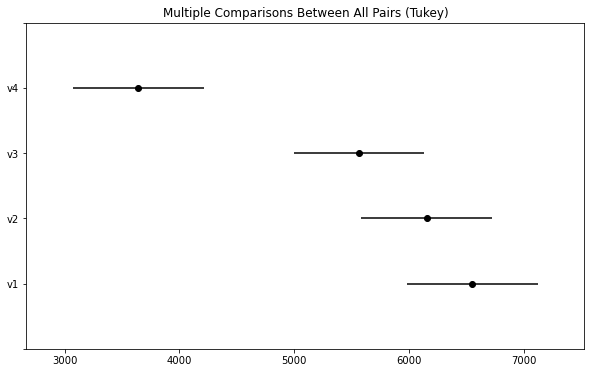

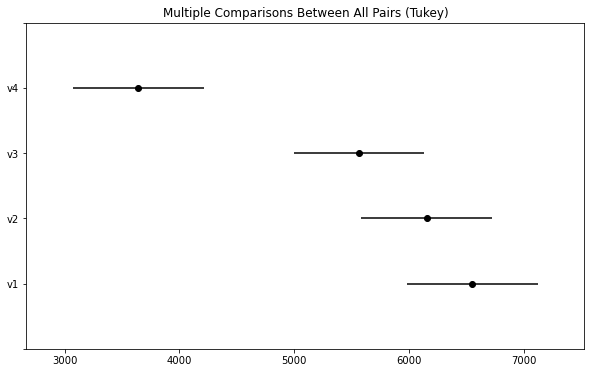

In [9]:
Tukey_HSD = pairwise_tukeyhsd(kapil['value'],kapil["var"],alpha=0.05)
print(Tukey_HSD)
Tukey_HSD.plot_simultaneous()

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
    n0     n1 5689.3333  0.001  3184.1352 8194.5315   True
    n0     n2 7241.6667  0.001  4736.4685 9746.8648   True
    n0     n3 7234.3333  0.001  4729.1352 9739.5315   True
    n0     n4 7024.6667  0.001  4519.4685 9529.8648   True
    n0     n5 6963.6667  0.001  4458.4685 9468.8648   True
    n1     n2 1552.3333 0.3572  -952.8648 4057.5315  False
    n1     n3    1545.0 0.3619  -960.1981 4050.1981  False
    n1     n4 1335.3333 0.5046 -1169.8648 3840.5315  False
    n1     n5 1274.3333 0.5468 -1230.8648 3779.5315  False
    n2     n3   -7.3333    0.9 -2512.5315 2497.8648  False
    n2     n4    -217.0    0.9 -2722.1981 2288.1981  False
    n2     n5    -278.0    0.9 -2783.1981 2227.1981  False
    n3     n4 -209.6667    0.9 -2714.8648 2295.5315  False
    n3     n5 -270.6667    0.9 -2775.8648 2234.5315  Fal

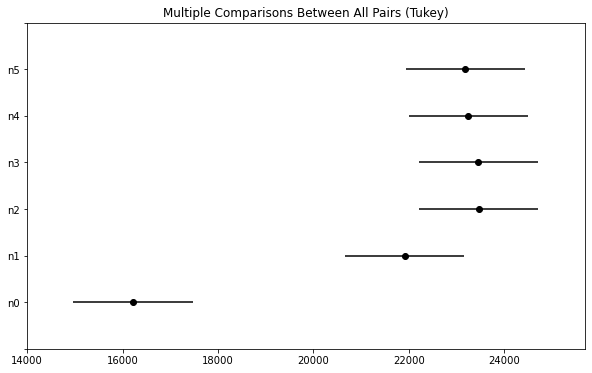

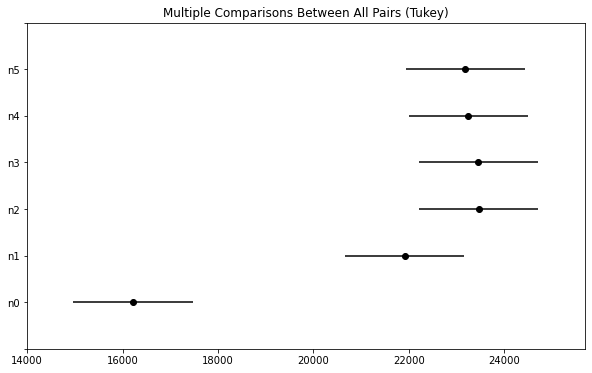

In [10]:
Tuk = MultiComparison(data['new'],data["nit"])
tukey=Tuk.tukeyhsd(0.05)
print(tukey.summary())
tukey.plot_simultaneous()

In [11]:
my_model_fit = AnovaRM(kapil,'value','rep',within=['nit','var']).fit()
my_model_fit.anova_table

,F Value,Num DF,Den DF,Pr > F
nit,42.867724,5.0,10.0,1.950485e-06
var,154.061626,3.0,6.0,4.581968e-06
nit:var,12.146386,15.0,30.0,6.975306e-09
